In [ ]:
import yfinance as yf #import this to download market data

#import pandas and numpy to transform data 
import pandas as pd
import numpy as np

#import to plot results and display plots made 
import matplotlib.pyplot as plt
%matplotlib inline 


Matplotlib is building the font cache; this may take a moment.


In [ ]:

#defining my etf tickers 
etfs = ['SPY', 'QQQ', 'IWM', 'EFA', 'EEM', 'XLK', 'XLF', 'XLE']

#pulling data from Yahoo Finance
data = yf.download(etfs, start="2018-01-01", end="2024-12-31")

#using .xs() pulls the close prices from the multi-index columns 
#this results in a cleaner table 
closePrices = data.xs('Close', axis=1, level=0)

#returns first few rows to check if our data was imported and displayed correctly
closePrices.head()



[*********************100%***********************]  8 of 8 completed


Ticker,EEM,EFA,IWM,QQQ,SPY,XLE,XLF,XLK
Date,,,,,,,,
2018-01-02,40.948368,57.591278,140.381088,150.949295,239.274063,53.147720,24.252956,60.087269
2018-01-03,41.340714,57.867725,140.527023,152.415985,240.787430,53.943684,24.383251,60.588474
2018-01-04,41.545406,58.501930,140.901001,152.682693,241.802429,54.269302,24.609108,60.894760
2018-01-05,41.903637,58.827179,141.192917,154.216080,243.413696,54.247597,24.678598,61.535187
2018-01-08,41.903637,58.810917,141.411835,154.816132,243.858810,54.573208,24.643852,61.767208


In [ ]:
# using the last trading day of each month
#('M') groups data by month, and .last() takes the last day of each month
# group data this way to match real world trading conditions
monthlyPrices = closePrices.resample('M').last()

#calculating the monthly % returns 
monthlyReturns = monthlyPrices.pct_change().dropna()

# display first few rows 
monthlyReturns.head()

C:\Users\okher\AppData\Local\Temp\ipykernel_30404\3150763048.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthlyPrices = closePrices.resample('m').last()


Ticker,EEM,EFA,IWM,QQQ,SPY,XLE,XLF,XLK
Date,,,,,,,,
2018-02-28,-0.058985,-0.048348,-0.038437,-0.012927,-0.036360,-0.108350,-0.029254,-0.004091
2018-03-31,0.005414,-0.008396,0.012175,-0.040789,-0.027410,0.017230,-0.041553,-0.037338
2018-04-30,-0.028169,0.015212,0.009813,0.005058,0.005168,0.094941,-0.004353,0.000612
2018-05-31,-0.026215,-0.018942,0.061636,0.056729,0.024309,0.029942,-0.009836,0.067828
2018-06-30,-0.045457,-0.015841,0.006143,0.011451,0.005751,0.005695,-0.017469,-0.002632


In [13]:
lookback = 3
top_n = 3

In [14]:
lookbackReturns = monthlyPrices.pct_change(lookback)
lookbackReturns.head()

Ticker,EEM,EFA,IWM,QQQ,SPY,XLE,XLF,XLK
Date,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30,-0.080541,-0.041983,-0.017178,-0.048400,-0.057931,-0.006874,-0.073641,-0.040690
2018-05-31,-0.048522,-0.012381,0.085107,0.018754,0.001381,0.147157,-0.055111,0.028586


In [15]:
rankings = lookbackReturns.rank(axis=1, ascending=False)
rankings.head()

Ticker,EEM,EFA,IWM,QQQ,SPY,XLE,XLF,XLK
Date,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30,8.0,4.0,2.0,5.0,6.0,1.0,7.0,3.0
2018-05-31,7.0,6.0,2.0,4.0,5.0,1.0,8.0,3.0


In [17]:
top_etfs = rankings <= top_n
top_etfs.head()

Ticker,EEM,EFA,IWM,QQQ,SPY,XLE,XLF,XLK
Date,,,,,,,,
2018-01-31,False,False,False,False,False,False,False,False
2018-02-28,False,False,False,False,False,False,False,False
2018-03-31,False,False,False,False,False,False,False,False
2018-04-30,False,False,True,False,False,True,False,True
2018-05-31,False,False,True,False,False,True,False,True


In [18]:
forwardReturns = monthlyReturns.shift(-1)
strategyReturns = (forwardReturns*top_etfs).mean(axis=1)
strategyReturns.head()

Date
2018-01-31         NaN
2018-02-28    0.000000
2018-03-31    0.000000
2018-04-30    0.019926
2018-05-31    0.001151
Freq: ME, dtype: float64

In [19]:
benchmarkReturns = monthlyReturns['SPY']

returnsDF = pd.DataFrame({
    'rotation strategy': strategyReturns,
    'SPY' : benchmarkReturns
}).dropna()

returnsDF.head()

,rotation strategy,SPY
Date,,
2018-02-28,0.000000,-0.036360
2018-03-31,0.000000,-0.027410
2018-04-30,0.019926,0.005168
2018-05-31,0.001151,0.024309
2018-06-30,0.007499,0.005751


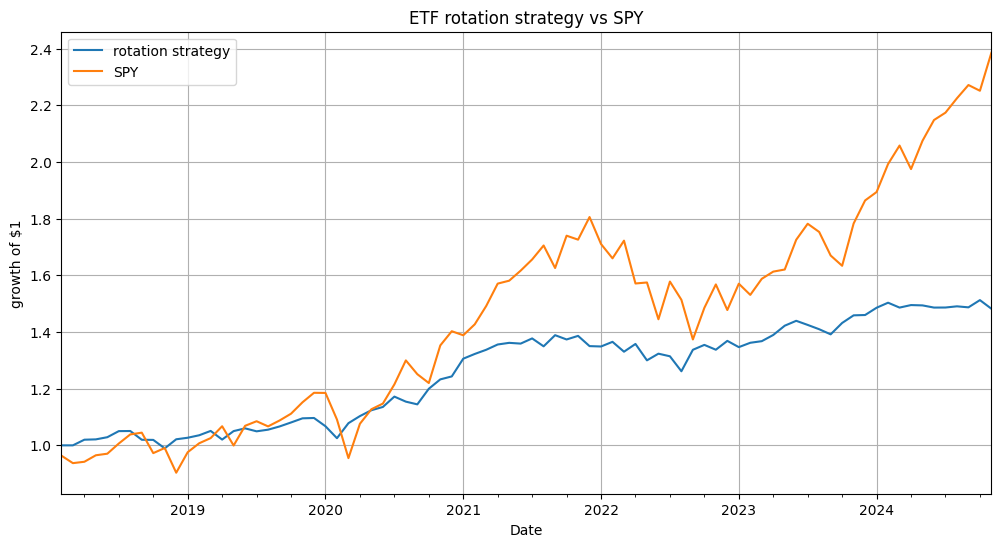

In [21]:
cumulative = (1 + returnsDF).cumprod()
cumulative.plot(figsize = (12, 6), title = 'ETF rotation strategy vs SPY')
plt.ylabel('growth of $1')
plt.grid(True)
plt.show()

In [26]:
# PERFORMANCE METRICS CALCULATION CODE HERE 

def calcpm(returns, riskfrate=0.0):
    periodsPerYear = 12

    cumulative = (1 + returns).cumprod()
    totReturn = cumulative.iloc[-1] - 1
    numyears = len(returns) / periodsPerYear

    cagr = (1 + totReturn) ** (1 / numyears) -1 

    excessReturns = returns - riskfrate / periodsPerYear
    sharpeRatio = (excessReturns.mean() / excessReturns.std())* np.sqrt(periodsPerYear)

    runningMax = cumulative.cummax()
    drawdown = cumulative /runningMax -1 
    maxDrawdown = drawdown.min()

    return round(cagr, 4), round(sharpeRatio, 4), round(maxDrawdown, 4)

In [27]:
cagr, sharpe, maxdd = calcpm(returnsDF['rotation strategy'])
print("rotation strategy - cagr: {:.2%}, Sharpe: {}, Max Drawdown: {:.2%}".format(cagr, sharpe, maxdd))

cagrSPY, sharpeSPY, maxddSPY = calcpm(returnsDF['SPY'])
print("SPY benchmark - cagr: {:.2%}, Sharpe: {}, Max Drawdown: {:.2%}".format(cagrSPY, sharpeSPY, maxddSPY))


rotation strategy - cagr: 5.93%, Sharpe: 0.8494, Max Drawdown: -9.17%
SPY benchmark - cagr: 13.57%, Sharpe: 0.8287, Max Drawdown: -23.93%
